In [1]:
# Import libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [11]:
df = pd.read_csv('Classified Data.csv', index_col = 0)

In [13]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [14]:
# scale the data 

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [18]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler()

In [19]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis = 1))

In [21]:
df_feat = pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [22]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df_feat

In [25]:
y = df['TARGET CLASS']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [65]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [66]:
pred = knn.predict(x_test)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
print(confusion_matrix(pred,y_test))

[[151  15]
 [  8 126]]


In [69]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       166
           1       0.89      0.94      0.92       134

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [46]:
# compare the performance of different of values of k

In [47]:
error_rate = []

In [48]:
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    

In [49]:
plt.figure(figsize = (10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

Text(0, 0.5, 'error rate')

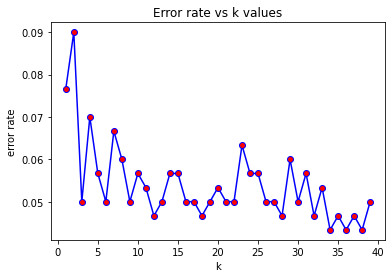

In [53]:
plt.plot(range(1,40), error_rate, color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.title('Error rate vs k values')
plt.xlabel('k')
plt.ylabel('error rate')

In [70]:
knn = KNeighborsClassifier(n_neighbors = 17)

In [71]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [72]:
pred = knn.predict(x_test)

In [73]:
print(confusion_matrix(pred,y_test))

[[153   9]
 [  6 132]]


In [74]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       162
           1       0.94      0.96      0.95       138

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

